In [1]:
import os, json, sys
sys.path.append('../..')

In [2]:
import os.path
import numpy as np
import os
import sklearn.model_selection

In [3]:
import sklearn

import sklearn.model_selection
import sklearn.linear_model
import sklearn.ensemble
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from pprint import pprint

In [4]:
from matplotlib import pyplot as plt
from pprint import pprint

In [5]:
path_ = '/media/tiagobotari/tiagobotari/data/text/rt-polaritydata/rt-polaritydata'
def load_polarity(path=path_):
    data = []
    labels = []
    f_names = ['rt-polarity.neg', 'rt-polarity.pos']
    for (l, f) in enumerate(f_names):
        for line in open(os.path.join(path, f), 'rb'):
            data.append(line.decode('utf8', errors='ignore').strip())
            labels.append(l)
    return data, labels

In [6]:
x, y = load_polarity()
x_train_all, x_test, y_train_all, y_test = train_test_split(
    x, y, test_size=.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_all, y_train_all, test_size=.1, random_state=42)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [7]:
len(x)

10662

In [8]:
class VectorizeText():
        def __init__(self):
            self.count_vect = CountVectorizer()
            self.tf_transformer = TfidfTransformer(use_idf=False)
        def fit(self, x):
            x = self.count_vect.fit_transform(x)
            self.tf_transformer.fit(x)
        def transform(self, x):
            x = self.count_vect.transform(x)
            x = self.tf_transformer.transform(x)
            return x     

In [9]:
vect_text = VectorizeText()
vect_text.fit(x_train)    
x_vec_train = vect_text.transform(x_train)

# Train Model
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_vec_train, y_train)

def MNB_predict(texts):
    return clf.predict(vect_text.transform(texts))
def MNB_predict_prob(texts):
    return clf.predict_proba(vect_text.transform(texts))

preds = MNB_predict(x_val)
print('Val accuracy', sklearn.metrics.accuracy_score(y_val, preds))


Val accuracy 0.7584994138335287


# Explanation

In [10]:
from density_lime.densities.density_word2vec import DensityWord2Vec

In [11]:
density = DensityWord2Vec(x_train_all)
print('Training Error:', density.manifold.loss_training)

Training Error: 2087109.5


In [12]:
from density_lime.explanations.statistics import ExplainStatistics

In [13]:
print('Similarities')
pprint(density.manifold.get_similar_words('a', n_sample=10))

Similarities
[('an', 0.9998746514320374),
 ('this', 0.9997983574867249),
 ('its', 0.9997810125350952),
 ('his', 0.9997724294662476),
 ('all', 0.9997309446334839),
 ('humor', 0.9997265338897705),
 ('life', 0.9997184872627258),
 ('lots', 0.9997103810310364),
 ('sense', 0.9997055530548096),
 ('one', 0.9997013211250305)]


In [14]:
print('Test:')
x_explain = x_test[1]
print(x_explain)
print('predicted - true')
print(MNB_predict([x_explain]), 1)
print(MNB_predict_prob([x_explain]), 1)

Test:
the movie's thesis -- elegant technology for the masses -- is surprisingly refreshing .
predicted - true
[1] 1
[[0.29029215 0.70970785]] 1


In [15]:
explainer = ExplainStatistics(model_predict=MNB_predict_prob, density=density)

In [16]:
x_explain

"the movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."

In [21]:
from pprint import pprint
# samples, features = explainer.explain_instance(x_explain=[x_explain], class_index=1, tol=0.0001)
explanation, con_fav_samples = explainer.explain_instance(x_explain=[x_explain], class_index=1, tol=0.0001)

0: the
["its movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 "the film's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's america -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis sometimes elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- an technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant process for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology into the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for its masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the cad -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses sometimes is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses -- story surprisingly

0: the
["vision movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 'the some thesis -- elegant technology for the masses -- is surprisingly refreshing .'
 "the movie's line -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis whose elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- artist technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant star for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology great the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for vision masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the scooby -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses whose is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses -- full surprisingly re

0: the
["usual movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 'the lacks thesis -- elegant technology for the masses -- is surprisingly refreshing .'
 "the movie's devoid -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis years elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- completely technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant movies for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology sometimes the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for usual masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the brings -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses years is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses -- proves su

self.previous_convergence
[ 0.29039435  0.31728368 -0.11035438 -0.04724738 -0.42122024 -0.05283195
  0.09059913  0.29039435 -0.24982434 -0.04724738  0.00347916 -0.39865453
 -1.          0.04308101]
[ 2.88840695e-01  3.16716922e-01 -1.07968629e-01 -4.86650439e-02
 -4.21177814e-01 -5.56489052e-02  9.29092842e-02  2.88840695e-01
 -2.53897254e-01 -4.86650439e-02  5.34495911e-04 -3.99055978e-01
 -1.00000000e+00  4.32745164e-02]
0: the
["debut movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 'the strange thesis -- elegant technology for the masses -- is surprisingly refreshing .'
 "the movie's entertainment -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis sex elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- goes technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant political for the masses -- is surprisingly refreshing ."
 "the movie's 

0: the
["fantasy movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 'the talent thesis -- elegant technology for the masses -- is surprisingly refreshing .'
 "the movie's delicate -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis part elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- attempt technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant brings for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology attempt the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for fantasy masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the significant -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses part is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses -- scen

self.previous_convergence
[ 0.30508762  0.317995   -0.11640696 -0.03985178 -0.45096273 -0.09688021
  0.08283153  0.30508762 -0.25230108 -0.03985178  0.00972265 -0.42775501
 -1.          0.02606864]
[ 0.30606061  0.31794457 -0.11668852 -0.03940389 -0.45016287 -0.09682061
  0.08352675  0.30606061 -0.2531267  -0.03940389  0.01163994 -0.42697788
 -1.          0.02443575]
0: the
["together movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 'the among thesis -- elegant technology for the masses -- is surprisingly refreshing .'
 "the movie's disturbing -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis filmmaker elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- right technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant horror for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology nature the masses -- is su

self.previous_convergence
[ 0.30275226  0.30833329 -0.1125997  -0.05405385 -0.46322827 -0.09607163
  0.08127712  0.30275226 -0.25281244 -0.05405385  0.00457407 -0.43672798
 -1.          0.00125716]
[ 0.30323242  0.30954617 -0.1125536  -0.05390317 -0.4620774  -0.09752804
  0.08200876  0.30323242 -0.25425819 -0.05390317  0.00508753 -0.43805346
 -1.          0.00182723]
0: the
["except movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 'the grief thesis -- elegant technology for the masses -- is surprisingly refreshing .'
 "the movie's culture -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis those elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- british technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant actually for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology gorgeous the masses -- is surpr

0: the
["top movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 'the extremely thesis -- elegant technology for the masses -- is surprisingly refreshing .'
 "the movie's flicks -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis crafted elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- extremely technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant ) for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology sure the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for top masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the alive -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses crafted is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses -- hearts surprising

self.previous_convergence
[ 0.27703309  0.29348913 -0.09894677 -0.04487298 -0.470704   -0.09262343
  0.07955106  0.27703309 -0.24365767 -0.04487298 -0.0034215  -0.42134826
 -1.          0.00270997]
[ 0.27663041  0.29318095 -0.09924458 -0.04493904 -0.47099024 -0.0931042
  0.07956152  0.27663041 -0.24260446 -0.04493904 -0.00332218 -0.42009074
 -1.          0.00387327]
0: the
["sexy movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 'the couple thesis -- elegant technology for the masses -- is surprisingly refreshing .'
 "the movie's bit -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis intimate elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- popcorn technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant imaginative for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology small the masses -- is surprisi

self.previous_convergence
[ 0.27208765  0.2935738  -0.09874953 -0.04410409 -0.47362973 -0.09170611
  0.07737484  0.27208765 -0.23582086 -0.04410409 -0.01032356 -0.4275797
 -1.         -0.00329204]
[ 0.2726103   0.29303529 -0.09849593 -0.04393257 -0.47290083 -0.09164432
  0.07791898  0.2726103  -0.23580079 -0.04393257 -0.01138872 -0.42674194
 -1.         -0.00314139]
0: the
["meaning movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 'the chemistry thesis -- elegant technology for the masses -- is surprisingly refreshing .'
 "the movie's understated -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis . elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- memorable technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant involved for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology disturbing the masses -- 

0: the
["who movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 'the sharp thesis -- elegant technology for the masses -- is surprisingly refreshing .'
 "the movie's lane -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis theme elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- toward technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant tension for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology eye the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for who masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the hopkins -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses theme is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses -- national surprisingly r

self.previous_convergence
[ 0.25827413  0.30288716 -0.0910264  -0.04975813 -0.49363737 -0.09894602
  0.08185176  0.25827413 -0.23794653 -0.04975813 -0.00815733 -0.43687125
 -1.         -0.01337705]
[ 0.2580285   0.30341337 -0.09127786 -0.04883433 -0.49336987 -0.09879362
  0.08293345  0.2580285  -0.23805797 -0.04883433 -0.00791898 -0.43665825
 -1.         -0.01277191]
0: the
["ending movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 'the unique thesis -- elegant technology for the masses -- is surprisingly refreshing .'
 "the movie's level -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis unexpected elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- entire technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant standard for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology persona the masses -- is sur

0: the
["mainly movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 'the members thesis -- elegant technology for the masses -- is surprisingly refreshing .'
 "the movie's evil -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis designed elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- fashion technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant taste for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology alive the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for mainly masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the making -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses designed is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses -- extraordi

0: the
["actor movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 'the come thesis -- elegant technology for the masses -- is surprisingly refreshing .'
 "the movie's delivered -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis simplistic elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- story's technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant nuanced for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology watch the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for actor masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the young -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses simplistic is surprisingly refreshing ."
 "the movie's thesis -- elegant technology for the masses -- visc

self.previous_convergence
[ 0.24467677  0.29547025 -0.08817344 -0.05808909 -0.50402806 -0.10954981
  0.08517278  0.24467677 -0.23968012 -0.05808909 -0.01665647 -0.44623279
 -1.         -0.02773306]
[ 0.24377576  0.29497842 -0.0885512  -0.05809298 -0.50394581 -0.10919207
  0.08569735  0.24377576 -0.24011975 -0.05809298 -0.01771281 -0.44563738
 -1.         -0.02721732]
0: the
["logic movie's thesis -- elegant technology for the masses -- is surprisingly refreshing ."
 'the kevin thesis -- elegant technology for the masses -- is surprisingly refreshing .'
 "the movie's else -- elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis grand elegant technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- century technology for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant wildly for the masses -- is surprisingly refreshing ."
 "the movie's thesis -- elegant technology imax the masses -- is surprisingly re

In [22]:
features

In [23]:
samples

{'stats': {},
 'importance': {'mean': {'0: the': 0.2414994779812241,
   "1: movie's": 0.2901200526775346,
   '2: thesis': -0.0876181981848364,
   '3: --': -0.060678926716311234,
   '4: elegant': -0.5073400421567904,
   '5: technology': -0.11110773136644182,
   '6: for': 0.08273851605256714,
   '7: the': 0.2414994779812241,
   '8: masses': -0.2383668058342729,
   '9: --': -0.060678926716311234,
   '10: is': -0.01641252448457309,
   '11: surprisingly': -0.44953569444032443,
   '12: refreshing': -1.0,
   '13: .': -0.033561128700217116},
  'median': {'0: the': 0.2661501149683458,
   "1: movie's": 0.3070133930535931,
   '2: thesis': -0.0734955195693474,
   '3: --': -0.04480920693547423,
   '4: elegant': -0.48926955544137163,
   '5: technology': -0.09923135670447895,
   '6: for': 0.09823761372555077,
   '7: the': 0.2661501149683458,
   '8: masses': -0.21870819758475063,
   '9: --': -0.04480920693547423,
   '10: is': 0.00012128447617483719,
   '11: surprisingly': -0.4391339610264027,
   '12: 

In [24]:
explanation

{'stats': {},
 'importance': {'mean': {'0: the': 0.2414994779812241,
   "1: movie's": 0.2901200526775346,
   '2: thesis': -0.0876181981848364,
   '3: --': -0.060678926716311234,
   '4: elegant': -0.5073400421567904,
   '5: technology': -0.11110773136644182,
   '6: for': 0.08273851605256714,
   '7: the': 0.2414994779812241,
   '8: masses': -0.2383668058342729,
   '9: --': -0.060678926716311234,
   '10: is': -0.01641252448457309,
   '11: surprisingly': -0.44953569444032443,
   '12: refreshing': -1.0,
   '13: .': -0.033561128700217116},
  'median': {'0: the': 0.2661501149683458,
   "1: movie's": 0.3070133930535931,
   '2: thesis': -0.0734955195693474,
   '3: --': -0.04480920693547423,
   '4: elegant': -0.48926955544137163,
   '5: technology': -0.09923135670447895,
   '6: for': 0.09823761372555077,
   '7: the': 0.2661501149683458,
   '8: masses': -0.21870819758475063,
   '9: --': -0.04480920693547423,
   '10: is': 0.00012128447617483719,
   '11: surprisingly': -0.4391339610264027,
   '12: 

In [25]:
means = explanation['importance']['mean']

In [26]:
from matplotlib import pyplot as plt

<BarContainer object of 14 artists>

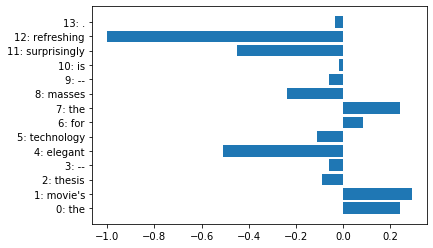

In [27]:
plt.barh([*means.keys()], [*means.values()])

In [28]:
con_fav_samples

In [29]:
con_fav_samples.samples_fav

["the movie's thesis -- elegant technology for the masses -- is surprisingly dull .",
 "the movie's thesis -- elegant technology for the masses -- is surprisingly pretentious .",
 "the movie's thesis -- elegant technology for the masses -- is surprisingly unfunny .",
 "the movie's thesis -- elegant technology for the ill-conceived -- is surprisingly refreshing .",
 "the movie's thesis -- elegant technology for the masses -- is surprisingly boring ."]

In [ ]:
dicta = {} 

In [ ]:
a = {'x': [1, 2, 3, 4], 'y': [1, 2, 3, 4]}

In [ ]:
a['x']

In [ ]:
dados = {'x':{'1':np.array([1,2,3,4,5]), '2':np.array([1,2,3,4,5])}}

In [ ]:
array_v = np.array([])
for key, values in dados['x'].items():
    if key='0':
        continue
    size_ = values.shape
    if size_[0] < 10:
        continue
    array_v = np.append(array_v, values)
    
array_v = array_v.reshape(-1, size_[0])

In [ ]:
array_v.transpose()

In [ ]:
array_v.shape